In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf

from tensorflow import keras

## Downloading the images (dataset)

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [9]:
data_dir

'.\\datasets\\flower_photos'

## Converting data_dir to Pathlib (windows path object)

In [11]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [19]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

## Displaing images

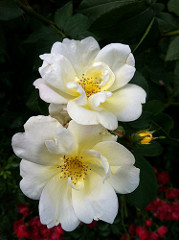

In [39]:
import PIL
PIL.Image.open(str(roses[0]))

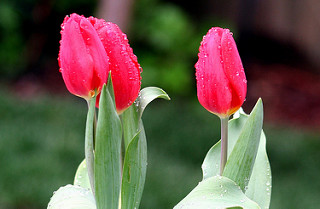

In [41]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

## Objects

In [48]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [52]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

#### Image files to OpenCV2 model

In [57]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

#### Image resizing

In [60]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [66]:
X, y = [], []
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name]) #need to be a number

In [72]:
y[:5]

[0, 0, 0, 0, 0]

#### resized img to numpy array

In [75]:
X = np.array(X)
y = np.array(y)

#### Train test split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [88]:
len(X_train)

2752

#### Scaling

In [91]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [97]:
X_train_scaled[0][0][0]

array([0.26666667, 0.30980392, 0.30196078])

### Model

#### building convolutional neural network

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

num_classes = 5 # flowers types

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.3170 - loss: 1.6635
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.5571 - loss: 1.0724
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.6459 - loss: 0.9056
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.7058 - loss: 0.7481
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.8173 - loss: 0.5066
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - accuracy: 0.9070 - loss: 0.2846
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.9466 - loss: 0.1723
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.9693 - loss: 0.0987
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.9719 - loss: 0.0880
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.9870 - loss: 0.0549


In [108]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6199 - loss: 2.0185


[1.9034041166305542, 0.6383442282676697]

In [112]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


array([[  3.0026479 ,  15.906263  ,  -2.5882201 , -15.395231  ,
         -6.497257  ],
       [  8.516107  ,  -1.8330626 , -10.925315  ,  -5.1211433 ,
          4.1112986 ],
       [ -4.6125565 ,   1.7230443 ,   6.628453  ,  -9.422276  ,
         -6.4054565 ],
       ...,
       [  2.6885688 ,  -2.9418485 ,  -4.748262  ,   4.9150214 ,
         -0.6485962 ],
       [ -2.94375   ,   1.8192275 ,   1.5465482 ,  -2.2973242 ,
         -7.1901474 ],
       [ -0.05921614, -11.790976  ,   1.9971668 ,   4.6309648 ,
          0.09279327]], dtype=float32)